In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


import seaborn as sns
import warnings
import os
from scipy.interpolate import griddata


''
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.callbacks import ModelCheckpoint


from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

import meshio
import re

## Training of model with MSE and RMSProp'

In [2]:
import cfdnetplus

case with linear interpolation in the training data set( check if cfdnetplu.extract2d_xy.py is set to linear) and linear interpolation in the the prediction. 
Also the domain is smaller please check that the doamin is <b>-50 to 50</b> in x and <b>-30 to 30</b> in y direction.

In [24]:
path_to_main= 'airfoil2d/'
folders=['airFoil_1000', 'airFoil_30', 'airFoil_300','airFoil_600', 'airFoil_2000']
fields= ['U','p','k','omega', 'nut']
xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05
modelid='model_mse_adam_real'

In [5]:
cfdnetplus.VTK2np(path_to_main,folders, fields,'xy' ,xres,yres,xlim,ylim,zcut)

processing data in airfoil2d/airFoil_1000/VTK/
airfoil2d/airFoil_1000/VTK/airFoil_1000_0/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_1/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_10/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_100/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_101/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_102/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_103/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_104/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_105/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_106/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_107/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_108/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_109/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_11/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_110/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_111/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_112/int

airfoil2d/airFoil_1000/VTK/airFoil_1000_229/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_23/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_230/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_231/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_232/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_233/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_234/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_235/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_236/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_237/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_238/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_239/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_24/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_240/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_241/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_242/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_243/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoi

airfoil2d/airFoil_1000/VTK/airFoil_1000_359/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_36/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_360/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_361/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_362/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_363/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_364/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_365/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_366/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_367/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_368/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_369/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_37/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_370/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_371/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_372/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_373/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoi

airfoil2d/airFoil_1000/VTK/airFoil_1000_489/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_49/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_490/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_491/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_492/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_493/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_494/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_495/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_496/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_497/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_498/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_499/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_5/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_50/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_500/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_501/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_502/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_

airfoil2d/airFoil_1000/VTK/airFoil_1000_619/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_62/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_620/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_621/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_622/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_623/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_624/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_625/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_626/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_627/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_628/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_629/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_63/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_630/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_631/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_632/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_633/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoi

airfoil2d/airFoil_1000/VTK/airFoil_1000_749/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_75/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_750/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_751/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_752/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_753/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_754/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_755/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_756/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_757/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_758/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_759/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_76/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_760/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_761/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_762/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_763/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoi

airfoil2d/airFoil_1000/VTK/airFoil_1000_879/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_88/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_880/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_881/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_882/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_883/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_884/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_885/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_886/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_887/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_888/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_889/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_89/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_890/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_891/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_892/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_893/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoi

airfoil2d/airFoil_30/VTK/airFoil_30_162/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_163/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_164/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_165/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_166/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_167/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_168/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_169/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_17/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_170/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_171/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_172/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_173/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_174/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_175/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_176/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_177/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_178/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_179/interna

airfoil2d/airFoil_30/VTK/airFoil_30_301/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_302/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_303/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_304/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_305/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_306/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_307/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_308/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_309/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_31/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_310/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_311/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_312/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_313/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_314/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_315/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_316/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_317/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_318/interna

airfoil2d/airFoil_30/VTK/airFoil_30_441/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_442/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_443/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_444/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_445/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_446/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_447/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_448/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_449/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_45/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_450/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_451/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_452/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_453/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_454/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_455/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_456/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_457/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_458/interna

airfoil2d/airFoil_30/VTK/airFoil_30_581/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_582/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_583/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_584/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_585/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_586/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_587/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_588/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_589/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_59/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_590/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_591/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_592/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_593/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_594/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_595/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_596/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_597/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_598/interna

airfoil2d/airFoil_30/VTK/airFoil_30_720/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_721/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_722/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_723/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_724/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_725/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_726/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_727/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_728/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_729/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_73/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_730/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_731/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_732/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_733/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_734/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_735/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_736/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_737/interna

airfoil2d/airFoil_30/VTK/airFoil_30_860/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_861/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_862/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_863/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_864/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_865/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_866/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_867/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_868/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_869/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_87/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_870/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_871/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_872/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_873/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_874/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_875/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_876/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_877/interna

airfoil2d/airFoil_300/VTK/airFoil_300_0/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_1/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_10/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_100/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_1000/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_101/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_102/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_103/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_104/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_105/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_106/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_107/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_108/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_109/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_11/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_110/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_111/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_112/internal.vtu
airfoil2d/airFo

airfoil2d/airFoil_300/VTK/airFoil_300_232/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_233/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_234/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_235/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_236/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_237/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_238/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_239/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_24/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_240/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_241/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_242/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_243/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_244/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_245/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_246/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_247/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_248/internal.vtu
airfoil2d/a

airfoil2d/airFoil_300/VTK/airFoil_300_368/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_369/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_37/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_370/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_371/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_372/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_373/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_374/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_375/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_376/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_377/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_378/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_379/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_38/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_380/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_381/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_382/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_383/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_300/VTK/airFoil_300_502/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_503/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_504/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_505/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_506/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_507/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_508/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_509/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_51/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_510/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_511/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_512/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_513/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_514/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_515/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_516/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_517/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_518/internal.vtu
airfoil2d/a

airfoil2d/airFoil_300/VTK/airFoil_300_638/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_639/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_64/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_640/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_641/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_642/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_643/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_644/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_645/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_646/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_647/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_648/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_649/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_65/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_650/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_651/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_652/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_653/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_300/VTK/airFoil_300_773/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_774/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_775/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_776/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_777/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_778/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_779/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_78/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_780/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_781/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_782/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_783/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_784/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_785/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_786/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_787/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_788/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_789/internal.vtu
airfoil2d/a

airfoil2d/airFoil_300/VTK/airFoil_300_908/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_909/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_91/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_910/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_911/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_912/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_913/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_914/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_915/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_916/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_917/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_918/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_919/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_92/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_920/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_921/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_922/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_923/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_600/VTK/airFoil_600_140/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_141/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_142/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_143/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_144/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_145/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_146/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_147/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_148/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_149/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_15/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_150/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_151/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_152/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_153/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_154/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_155/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_156/internal.vtu
airfoil2d/a

airfoil2d/airFoil_600/VTK/airFoil_600_276/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_277/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_278/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_279/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_28/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_280/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_281/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_282/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_283/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_284/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_285/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_286/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_287/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_288/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_289/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_29/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_290/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_291/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_600/VTK/airFoil_600_410/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_411/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_412/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_413/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_414/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_415/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_416/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_417/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_418/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_419/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_42/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_420/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_421/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_422/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_423/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_424/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_425/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_426/internal.vtu
airfoil2d/a

airfoil2d/airFoil_600/VTK/airFoil_600_546/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_547/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_548/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_549/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_55/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_550/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_551/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_552/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_553/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_554/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_555/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_556/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_557/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_558/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_559/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_56/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_560/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_561/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_600/VTK/airFoil_600_681/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_682/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_683/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_684/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_685/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_686/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_687/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_688/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_689/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_69/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_690/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_691/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_692/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_693/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_694/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_695/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_696/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_697/internal.vtu
airfoil2d/a

airfoil2d/airFoil_600/VTK/airFoil_600_816/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_817/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_818/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_819/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_82/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_820/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_821/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_822/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_823/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_824/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_825/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_826/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_827/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_828/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_829/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_83/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_830/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_831/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_600/VTK/airFoil_600_951/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_952/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_953/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_954/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_955/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_956/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_957/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_958/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_959/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_96/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_960/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_961/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_962/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_963/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_964/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_965/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_966/internal.vtu
airfoil2d/airFoil_600/VTK/airFoil_600_967/internal.vtu
airfoil2d/a

airfoil2d/airFoil_2000/VTK/airFoil_2000_181/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_182/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_183/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_184/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_185/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_186/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_187/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_188/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_189/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_19/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_190/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_191/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_192/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_193/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_194/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_195/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_196/internal.vtu
airfoil2d/airFoil_2000/VTK/airFo

airfoil2d/airFoil_2000/VTK/airFoil_2000_311/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_312/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_313/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_314/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_315/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_316/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_317/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_318/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_319/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_32/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_320/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_321/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_322/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_323/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_324/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_325/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_326/internal.vtu
airfoil2d/airFoil_2000/VTK/airFo

airfoil2d/airFoil_2000/VTK/airFoil_2000_441/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_442/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_443/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_444/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_445/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_446/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_447/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_448/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_449/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_45/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_450/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_451/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_452/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_453/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_454/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_455/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_456/internal.vtu
airfoil2d/airFoil_2000/VTK/airFo

airfoil2d/airFoil_2000/VTK/airFoil_2000_571/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_572/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_573/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_574/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_575/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_576/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_577/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_578/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_579/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_58/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_580/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_581/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_582/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_583/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_584/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_585/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_586/internal.vtu
airfoil2d/airFoil_2000/VTK/airFo

airfoil2d/airFoil_2000/VTK/airFoil_2000_701/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_702/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_703/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_704/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_705/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_706/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_707/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_708/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_709/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_71/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_710/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_711/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_712/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_713/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_714/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_715/internal.vtu
airfoil2d/airFoil_2000/VTK/airFoil_2000_716/internal.vtu
airfoil2d/airFoil_2000/VTK/airFo

['airfoil2d/airFoil_1000/VTK/',
 'airfoil2d/airFoil_30/VTK/',
 'airfoil2d/airFoil_300/VTK/',
 'airfoil2d/airFoil_600/VTK/',
 'airfoil2d/airFoil_2000/VTK/']

In [4]:

df = np.empty((0,66,256,7))
df_label = np.empty((0,66,256,7))
path_to_folders=[]
for i in folders:
    path_to_folders.append(path_to_main+i+'/VTK/')
    df_t=np.load(path_to_main+i+'/VTK/df.npy')
    df_tlabel=np.load(path_to_main+i+'/VTK/df_label.npy')
    df=np.concatenate((df,df_t))
    df_label=np.concatenate((df_label,df_tlabel))
print(df_label.shape)

(4721, 66, 256, 7)


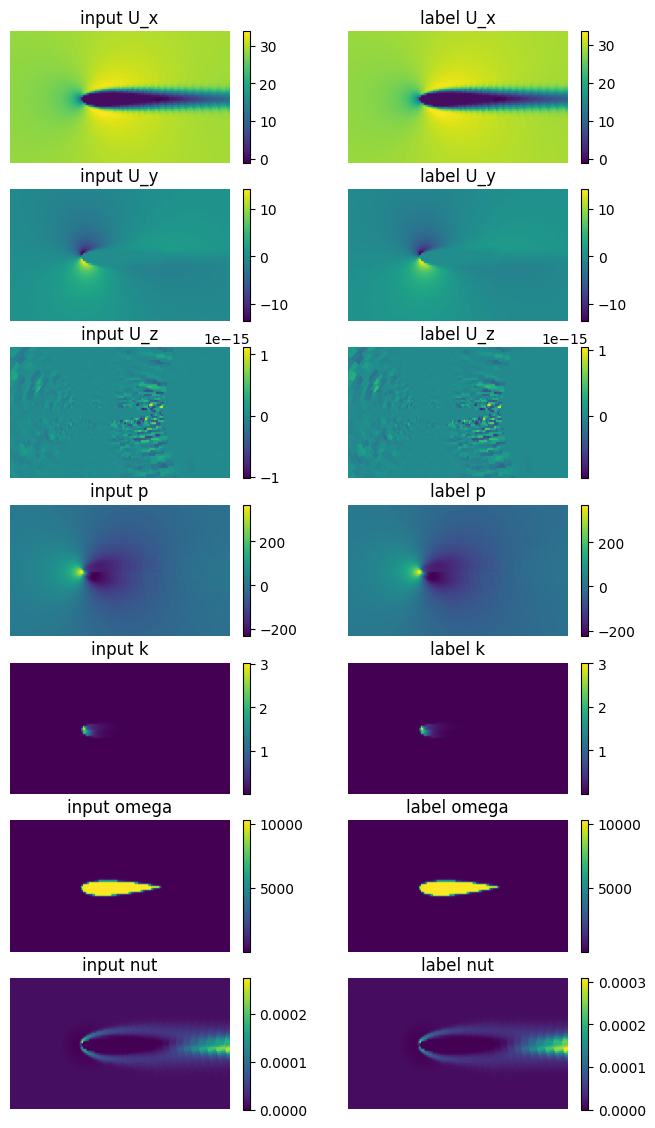

In [5]:
n=400
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=df.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(df[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(df_label[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('label '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

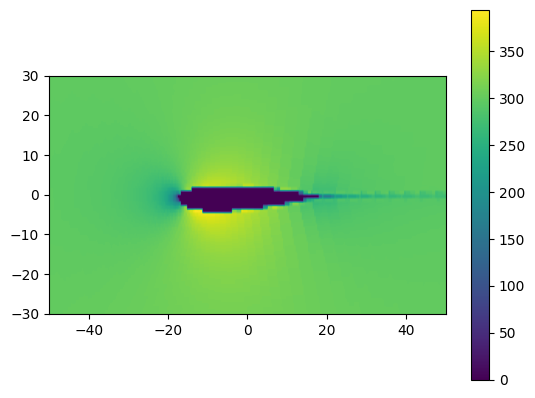

In [6]:
plt.imshow(df[1000,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.colorbar()

In [26]:
#normalise U Vektors
U_max=np.max(abs(df[:,:,:,[0,1,2]]))
p_max=np.max(abs(df[:,:,:,[3]]))
k_max=np.max(abs(df[:,:,:,[4]]))
omega_max=np.max(abs(df[:,:,:,[5]]))
nut_max=np.max(abs(df[:,:,:,[6]]))

model_path='cfdnetplus_models/'+modelid+'/'
normal=np.array([U_max,U_max,U_max, p_max,k_max, omega_max,nut_max]).reshape(1,1,1,7)
print(normal)

if os.path.isdir(model_path)== False:
    os.mkdir(model_path)
np.save(model_path+'normal',normal)


[[[[7.57129364e+01 7.57129364e+01 7.57129364e+01 3.37646484e+04
    4.55361099e+01 1.02719004e+04 7.69115612e-02]]]]


In [7]:
contents=''
for field in fields:
    contents=contents+field+ '\n'
print(contents)
with open(model_path+'fields',"w") as f:
            f.writelines(contents)
dims=np.array([xres,yres,xlim[0],xlim[1],ylim[0],ylim[1],zcut])
np.save(model_path+'dims',dims)

U
p
k
omega
nut



In [8]:
df1=df*1/normal
df_label1=df_label/normal

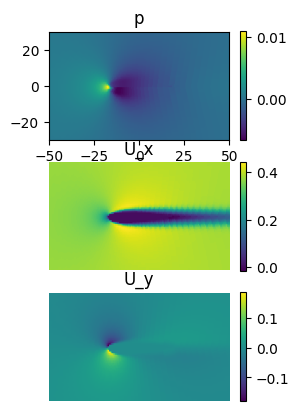

In [14]:
fig = plt.figure()

fig.add_subplot(3, 2, 1)
plt.imshow(df_label1[n,:,:,3],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('p')
plt.axis('on')
plt.colorbar()


fig.add_subplot(3, 2, 3)
plt.imshow(df_label1[n,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('U_x')
plt.axis('off')
plt.colorbar()

fig.add_subplot(3, 2, 5)
plt.imshow(df_label1[n,:,:,1],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('U_y')
plt.axis('off')

plt.colorbar()
plt.show()

In [9]:
train_data, test_data, label_train, label_test = train_test_split (df1, df_label1, test_size = 0.15)

20


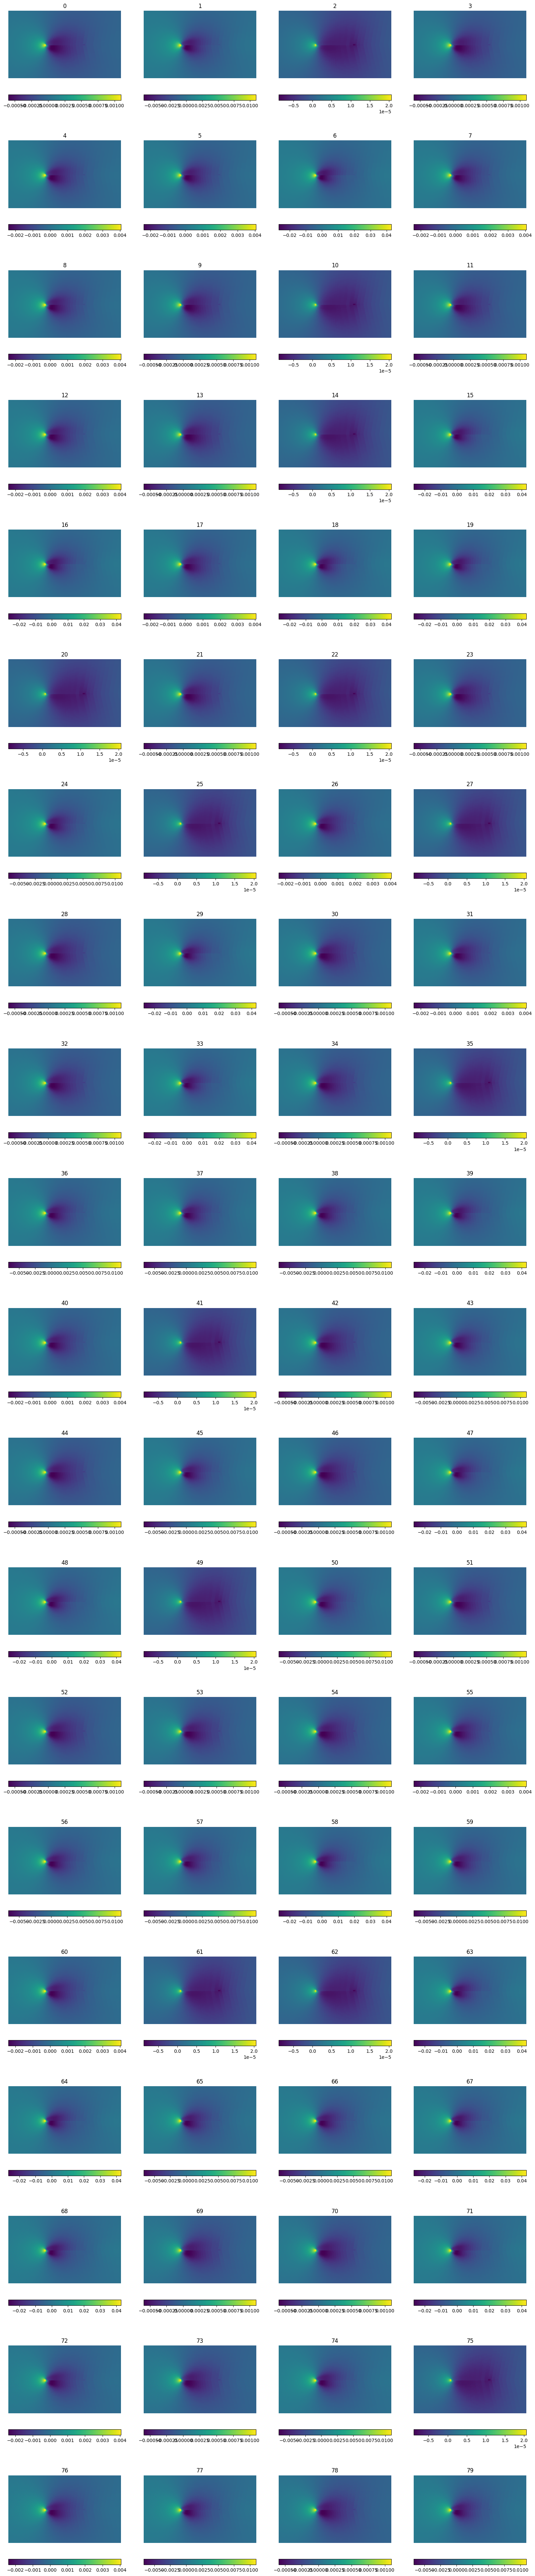

In [16]:
[a,b,c,d]=label_train.shape
fig = plt.figure(figsize=(20, 100))
columns = 4
rows = 20
print(rows)

for i in range( columns * rows):
    img = label_train[(i-1),:,:,3]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(i)
    plt.axis('off')
    plt.colorbar(location='bottom')

plt.show()

In [10]:
# Valid for input with four layers
model = models.Sequential()
model.add(layers.Conv2D(32,( 4,12), (2, 8), activation='tanh',padding="same", input_shape=(66,256, 7)))
model.add(layers.Conv2D(64,(6), (3, 4), activation='tanh',padding="same",))
model.add(layers.Conv2D(256,(16,12), (11, 8), activation='tanh',padding="same",))
model.add(layers.Conv2DTranspose(32,(14,10),(11,8), activation='tanh',padding="same"))
model.add(layers.Conv2DTranspose(16,(6,8),(3,4), activation='tanh',padding="same"))
model.add(layers.Conv2DTranspose(7,(4,16),(2,8), activation='PReLU', padding="same"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 33, 32, 32)        10784     
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 8, 64)         73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 256)         3145984   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 11, 8, 32)        1146912   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 33, 32, 16)       24592     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 66, 256, 7)       1

In [12]:
opt = tf.keras.optimizers.experimental.RMSprop(learning_rate=7e-5)
model.compile(optimizer='Adam',
              loss='MSE')

In [13]:
folders=os.listdir('training/')
print(folders)
sub='training_'
folders = [x for x in folders if re.search(sub, x)]
#print(len(folders))
if len(folders)==0:
    filefolder=sub+'0'
else:
    id=[]
    for txt in folders:
        t=txt.split('_')
        id.append(int(t[len(t)-1]))
    index_max=np.argmax(id)
    filefolder= sub+str(id[index_max]+1)
print(filefolder)

['training_0', 'training_23', 'training_24', 'training_25', 'training_26', 'training_27', 'training_28', 'training_29', 'training_30', 'training_31', 'training_32', 'training_33', 'training_34', 'training_35', 'training_36', 'training_37', 'training_38', 'training_39', 'training_40', 'training_41']
training_42


In [14]:
filepath ='training/'+ filefolder+'/'+'vae_best_model_relu.epoch{epoch:02d}-loss{loss:.5f}.w'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=1,
                             save_weights_only=True,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [15]:
history = model.fit(train_data, label_train, epochs=100, 
                    validation_data=(test_data, label_test),
                    batch_size=32,
                   callbacks=callbacks)

Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 0.0046
Epoch 1: loss improved from inf to 0.00459, saving model to training/training_42\vae_best_model_relu.epoch01-loss0.00459.w
126/126 [==============================] - 40s 304ms/step - loss: 0.0046 - val_loss: 4.7406e-04
Epoch 2/100
126/126 [==============================] - ETA: 0s - loss: 3.3105e-04
Epoch 2: loss improved from 0.00459 to 0.00033, saving model to training/training_42\vae_best_model_relu.epoch02-loss0.00033.w
126/126 [==============================] - 37s 291ms/step - loss: 3.3105e-04 - val_loss: 1.9888e-04
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 1.4903e-04
Epoch 3: loss improved from 0.00033 to 0.00015, saving model to training/training_42\vae_best_model_relu.epoch03-loss0.00015.w
126/126 [==============================] - 36s 286ms/step - loss: 1.4903e-04 - val_loss: 8.7904e-05
Epoch 4/100
126/126 [==============================] - ETA: 0s - loss: 6.9494e-05
Epo

Epoch 31/100
126/126 [==============================] - ETA: 0s - loss: 8.0244e-06
Epoch 31: loss did not improve from 0.00001
126/126 [==============================] - 36s 284ms/step - loss: 8.0244e-06 - val_loss: 6.0946e-06
Epoch 32/100
126/126 [==============================] - ETA: 0s - loss: 7.5903e-06
Epoch 32: loss did not improve from 0.00001
126/126 [==============================] - 36s 288ms/step - loss: 7.5903e-06 - val_loss: 3.8781e-06
Epoch 33/100
126/126 [==============================] - ETA: 0s - loss: 1.1561e-05
Epoch 33: loss did not improve from 0.00001
126/126 [==============================] - 36s 285ms/step - loss: 1.1561e-05 - val_loss: 3.7450e-06
Epoch 34/100
126/126 [==============================] - ETA: 0s - loss: 9.7620e-06
Epoch 34: loss did not improve from 0.00001
126/126 [==============================] - 36s 285ms/step - loss: 9.7620e-06 - val_loss: 2.5315e-05
Epoch 35/100
126/126 [==============================] - ETA: 0s - loss: 1.3344e-05
Epoch 35:

126/126 [==============================] - ETA: 0s - loss: 3.2029e-06
Epoch 65: loss improved from 0.00000 to 0.00000, saving model to training/training_42\vae_best_model_relu.epoch65-loss0.00000.w
126/126 [==============================] - 37s 292ms/step - loss: 3.2029e-06 - val_loss: 3.0305e-06
Epoch 66/100
126/126 [==============================] - ETA: 0s - loss: 3.0696e-06
Epoch 66: loss improved from 0.00000 to 0.00000, saving model to training/training_42\vae_best_model_relu.epoch66-loss0.00000.w
126/126 [==============================] - 36s 287ms/step - loss: 3.0696e-06 - val_loss: 2.9071e-06
Epoch 67/100
126/126 [==============================] - ETA: 0s - loss: 2.9470e-06
Epoch 67: loss improved from 0.00000 to 0.00000, saving model to training/training_42\vae_best_model_relu.epoch67-loss0.00000.w
126/126 [==============================] - 36s 287ms/step - loss: 2.9470e-06 - val_loss: 2.7923e-06
Epoch 68/100
126/126 [==============================] - ETA: 0s - loss: 2.8305e-

126/126 [==============================] - ETA: 0s - loss: 4.1830e-05
Epoch 95: loss did not improve from 0.00000
126/126 [==============================] - 39s 309ms/step - loss: 4.1830e-05 - val_loss: 5.6982e-06
Epoch 96/100
126/126 [==============================] - ETA: 0s - loss: 3.7890e-05
Epoch 96: loss did not improve from 0.00000
126/126 [==============================] - 39s 307ms/step - loss: 3.7890e-05 - val_loss: 2.0603e-05
Epoch 97/100
126/126 [==============================] - ETA: 0s - loss: 3.8496e-05
Epoch 97: loss did not improve from 0.00000
126/126 [==============================] - 39s 308ms/step - loss: 3.8496e-05 - val_loss: 1.3485e-05
Epoch 98/100
126/126 [==============================] - ETA: 0s - loss: 3.7403e-05
Epoch 98: loss did not improve from 0.00000
126/126 [==============================] - 38s 305ms/step - loss: 3.7403e-05 - val_loss: 2.2868e-05
Epoch 99/100
126/126 [==============================] - ETA: 0s - loss: 3.7137e-05
Epoch 99: loss did not

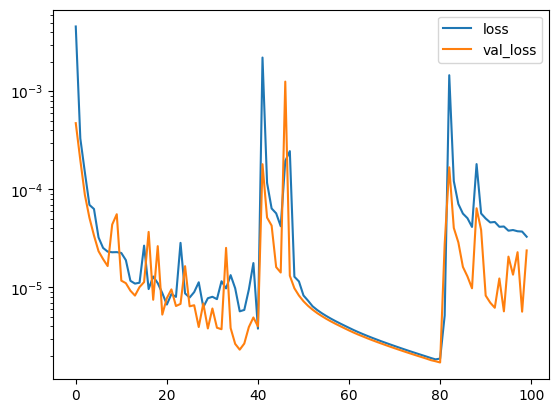

In [16]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
#plt.xlabel('Epoch')
#plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.yscale('log')
plt.legend(loc='upper right')

Finding the last epoch in the training folder

In [17]:
#filefolder= 'training_6'

folders=os.listdir('training/'+filefolder)
#folders=os.listdir('training/'+'training_0/')

sub='index'
folders = [x for x in folders if re.search(sub, x)]

ts=[]
for folder in folders:
    a=re.search('\d{2,3}',folder)
    ts.append(int(a.group(0)))
    #print(a.group(0))
index_max=np.max(ts)
print(index_max)
latest = [x for x in folders if re.search(str(index_max), x)]

latest=latest[0].split('.index')
print(latest[0])

80
vae_best_model_relu.epoch80-loss0.00000.w


In [18]:
#weights_path='training/training_28/vae_best_model_relu.epoch29-loss0.00002.w'
weights_path='training/'+filefolder+'/'+latest[0]

#weights_path='training/'+'training_0'+'/'+latest[0]

print(weights_path)
model.load_weights(weights_path)

training/training_42/vae_best_model_relu.epoch80-loss0.00000.w


In [19]:
test=model.predict(test_data)

23/23 [==============================] - 2s 67ms/step


In [20]:
print(label_test.shape[0])
n=5
print('max:' , np.max(test[:,:,:,n]))
print('min:' , np.min(test[:,:,:,n]))
#label_test=label_test.reshape((36,66,256,4))
#plt.imshow(np.clip(label_test[1,:,:,3],0,1))

709
max: 1.0114973
min: 1.1670993e-06


In [21]:
test1=test*normal
label_test1=label_test*normal

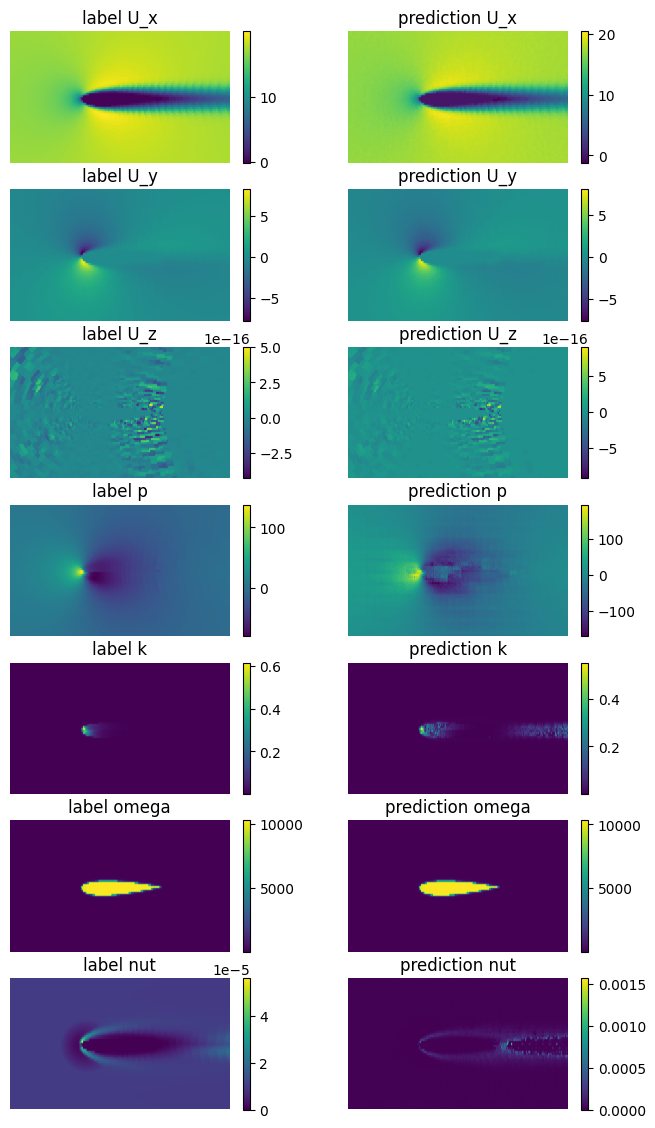

In [22]:
n=23
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=test.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']


for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(label_test1[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('label ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(test1[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('prediction ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
   

plt.show()

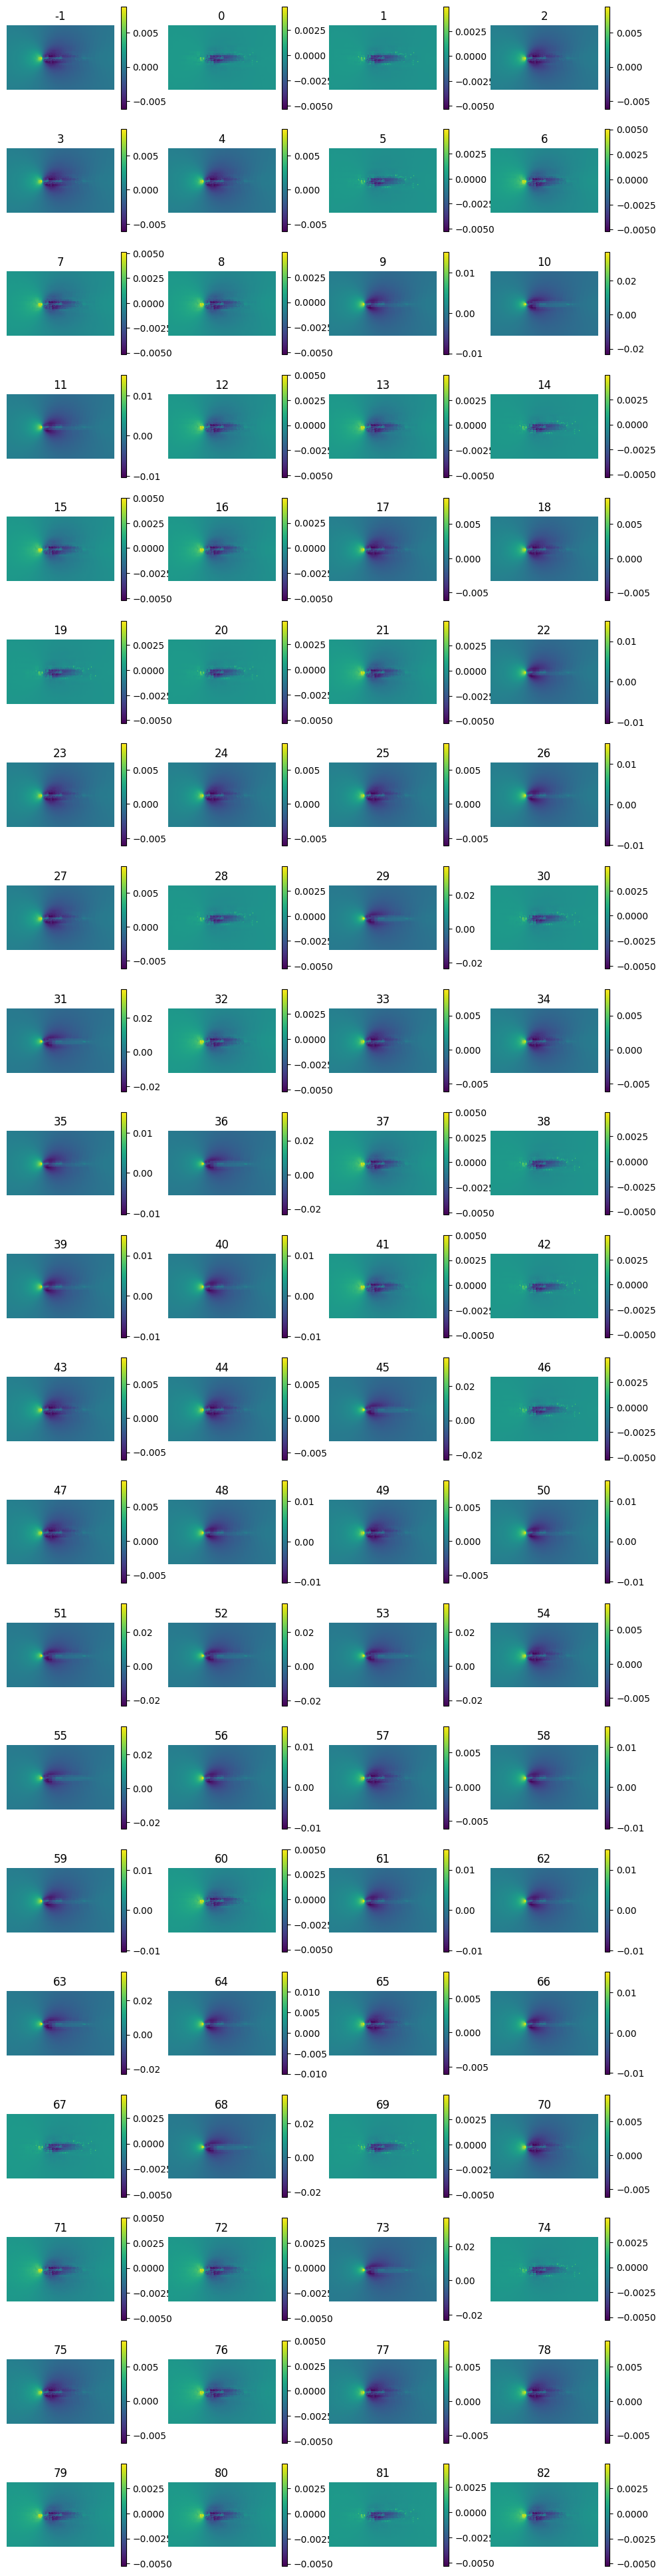

In [34]:
[a,b,c,d]=test.shape
fig = plt.figure(figsize=(12, 50))
columns = 4
rows = 21

for i in range( columns * rows):
    img = test[(i-1),:,:,3]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(i-1)
    plt.axis('off')
    plt.colorbar()
plt.show()
    

In [78]:
mse=[]
ssim1=[]
for i in range(label_test.shape[0]):
    mse.append(mean_squared_error(test[i,:,:,3],label_test[i,:,:,3]))
    ssim1.append(ssim(test[i,:,:,3],label_test[i,:,:,3]))
print('max mse:'+ str(max(mse)))
print(ssim1[n])
print(mse[n])
mse=np.mean(mse)
ssim2=np.mean(ssim1[:])
print('average ssim: '+str(ssim2))
print('average mse: '+str(mse))

C:\Users\hansi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


max mse:9.58870668816349e-06
0.9994876737713814
2.1063803063410987e-07
average ssim: 0.9989828735890596
average mse: 5.161009385046328e-07


In [25]:
#os.mkdir('cfdnetplus_models')
model.save('cfdnetplus_models/'+modelid+'/')

INFO:tensorflow:Assets written to: cfdnetplus_models/model_mse_adam_real/assets


INFO:tensorflow:Assets written to: cfdnetplus_models/model_mse_adam_real/assets
